# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
# Name: Arel Reifman, Last 4 digit ID: 4842
# name:Omer Trabulski,last 4 digit id: 8306
# name:Idan buhnik ,last 4 digit id:4462 


# Part 2 - Initial Preparations

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

import warnings 
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.decomposition import PCA


In [68]:
file_train= 'wine_train.csv'
file_test= 'wine_test.csv'
df_train= pd.read_csv(file_train)
df_test= pd.read_csv(file_test)

In [69]:
df_train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [70]:
df_test.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


Statistics for the wine_train.csv

# Part 3 - Experiments

In [71]:
print(df_train.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.540979   
min         0.9

In [ ]:
# The code performs graphical data analysis of various wine features, including statistical description, histograms, box plots, a correlation matrix, and KDE plots

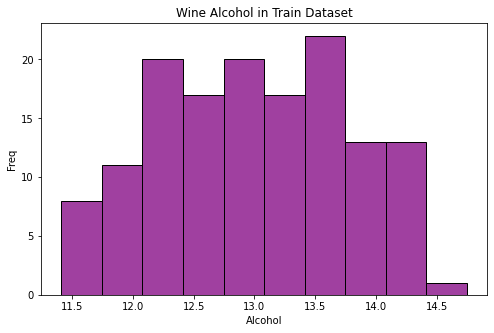

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['alcohol'],bins=10,kde=False,color='purple')
plt.title('Wine Alcohol in Train Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Freq')
plt.show()

Text(0, 0.5, 'Malic Acid')

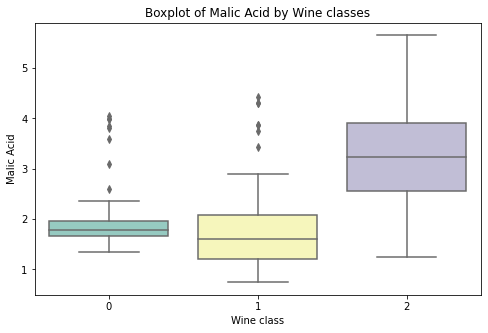

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target',y='malic_acid',data=df_train,palette='Set3')
plt.title('Boxplot of Malic Acid by Wine classes')
plt.xlabel('Wine class')
plt.ylabel('Malic Acid')

Text(0.5, 1.0, 'Correlation Heatmap for Wine')

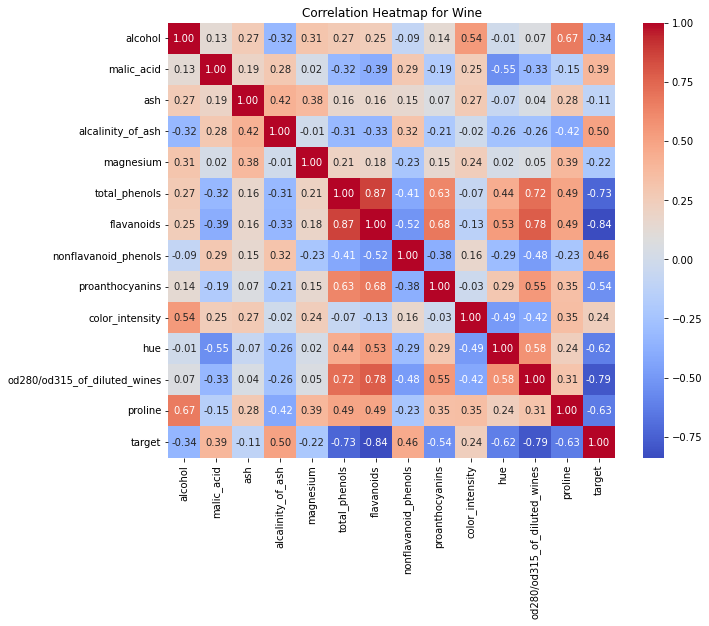

In [74]:
plt.figure(figsize=(10,8))
correlation_matrix= df_train.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap for Wine')

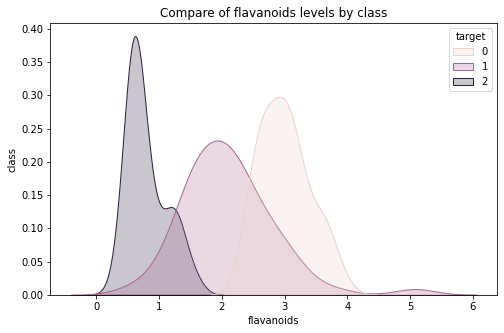

In [75]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_train,x='flavanoids',hue='target',fill=True)
plt.title('Compare of flavanoids levels by class')
plt.xlabel('flavanoids')
plt.ylabel('class')
plt.show()

In [ ]:
#Defining a List of Classification Models and Their Hyperparameters

In [76]:
#SVC is a machine learning algorithm used for classification tasks that finds the best boundary between different classes of data.
#Multinomial Naive Bayes is a simple yet effective algorithm for classifying text data based on the frequency of words.

models_list = [MultinomialNB(),DecisionTreeClassifier(random_state=42),svm.SVC(random_state=42)
               ,LinearSVC(random_state=42),KNeighborsClassifier(),
               Perceptron(random_state=42),SGDClassifier(random_state=42),
               LogisticRegression(random_state=42),GaussianNB()]

In [82]:
params = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']},
          {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
          {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'dual': [False]},
          {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
          {'alpha': [0.0001, 0.05], 'penalty': [None, 'l2', 'l1', 'elasticnet']},
          {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                            'penalty': ['l2', 'l1', 'elasticnet'],
                            'alpha': [0.0001, 0.05]},
          {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
         {'priors': [None], 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}
         ]

In [83]:
X_Pca = df_train.drop(columns=['target'])
X_test= df_test.drop(columns=['target'])
y = df_train['target']
y_test=df_test['target']

In [84]:
def cross_validation(mdl, X, y):
    scores = cross_val_score(mdl, X, y, scoring=make_scorer(f1_score, average='f1'), cv=10)
    return scores

In [85]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X_Pca) #we scale the features using StandardScaler

pca= PCA(n_components=0.95) # We use PCA here to reduce the dimensions
X_pca= pca.fit_transform(X_scaled)

# Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
#Analyzing Grid Search Results

In [86]:
import pandas as pd

results = []

scoring_metric = make_scorer(f1_score, average='macro')

for mdl, param_grid in zip(models_list, params):
    if not param_grid: 
        continue
    grid_search = GridSearchCV(estimator=mdl, param_grid=param_grid, cv=5, scoring=scoring_metric, n_jobs=-1)
    grid_search.fit(X_Pca, y)
    
    # model name, best parameters, and best score
    result = {
        'Model': mdl.__class__.__name__,
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }
    
    results.append(result)

results_df = pd.DataFrame(results)

# summary table)
print("Summary Table:")
print(results_df)

print("\nBest Scores for Each Model:")
for index, row in results_df.iterrows():
    print(f"Best {scoring_metric._score_func.__name__} for {row['Model']}: {row['Best Score']}")



Summary Table:
                    Model                                    Best Parameters  \
0           MultinomialNB                                   {'alpha': 0.001}   
1  DecisionTreeClassifier           {'criterion': 'entropy', 'max_depth': 5}   
2                     SVC                     {'C': 0.1, 'kernel': 'linear'}   
3               LinearSVC         {'C': 100, 'dual': False, 'penalty': 'l1'}   
4    KNeighborsClassifier           {'n_neighbors': 7, 'weights': 'uniform'}   
5              Perceptron                 {'alpha': 0.0001, 'penalty': 'l2'}   
6           SGDClassifier  {'alpha': 0.05, 'loss': 'modified_huber', 'pen...   
7      LogisticRegression                        {'C': 0.1, 'penalty': 'l2'}   
8              GaussianNB           {'priors': None, 'var_smoothing': 1e-09}   

   Best Score  
0    0.826522  
1    0.945759  
2    0.952445  
3    0.964267  
4    0.660951  
5    0.452857  
6    0.680910  
7    0.945926  
8    0.965529  

Best Scores for Each Mo

# Part 5 - Apply on test and show model performance estimation (Was shown previously)

In [ ]:
# Making Predictions with a Gaussian Naive Bayes Model

In [87]:
model= GaussianNB(priors= None, var_smoothing= 1e-09)
model.fit(X_Pca,y)
y_prediction=model.predict(X_test)
df_prediction= pd.DataFrame(y_prediction,columns=['target'])
df_prediction.head()

,target
0,2
1,0
2,2
3,1
4,2
